Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

Loading the dataset as a CSV

In [4]:
df = pd.read_csv('/content/DS - Assignment Part 1 data set.csv')
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


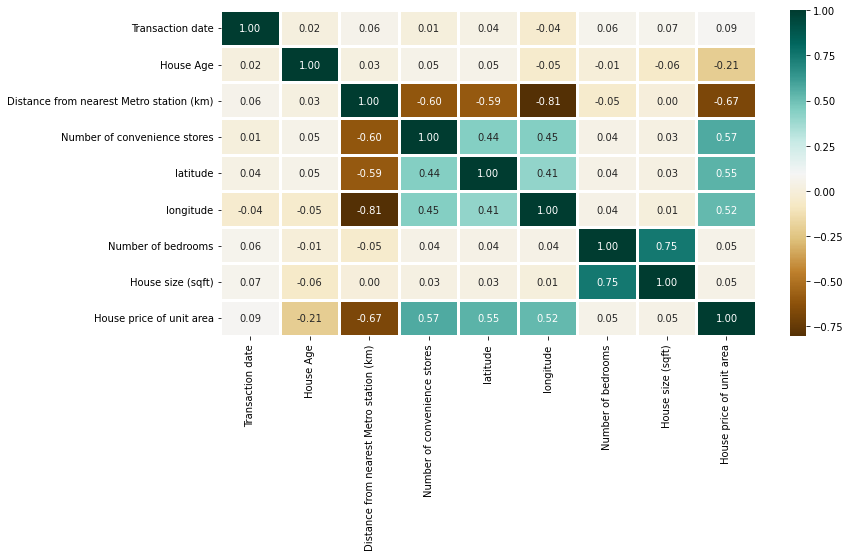

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [6]:
df.isna().sum().sum()

0

Splitting the dataset into training and testing

In [7]:
X = df.drop(['House price of unit area'], axis=1)
Y = df['House price of unit area']
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

Creating a Linear Regression Model

In [8]:
model_LR = linear_model.LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred_LR = model_LR.predict(X_valid)
err_LR = mean_absolute_percentage_error(Y_valid, Y_pred_LR)
print(err_LR)
print(mean_squared_error(Y_valid, Y_pred_LR))

0.17012887526205345
59.75957631619199


Creating a Support Vector Regression Model

In [9]:
from sklearn import svm
from sklearn.svm import SVC
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred_SVR = model_SVR.predict(X_valid)
err_SVR = mean_absolute_percentage_error(Y_valid, Y_pred_SVR)
print(err_SVR)
print(mean_squared_error(Y_valid, Y_pred_SVR))

0.19952337288497438
75.99508345296083


Creating a Random Forest Regression Model

In [10]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred_RFR = model_RFR.predict(X_valid)
err_RFR = mean_absolute_percentage_error(Y_valid, Y_pred_RFR)
print(err_RFR)
print(mean_squared_error(Y_valid, Y_pred_RFR))

0.1371526832176932
50.76311204819279


Visualizing the results of various models

In [11]:
features = X_valid.columns.values.tolist()
X_valid_array = X_valid[features].values
#X_valid_array

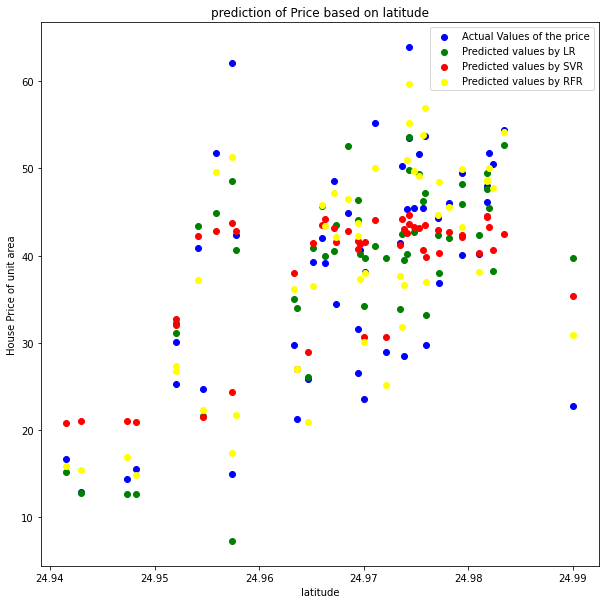

In [12]:
f = 4 #The feature number, can be changed as per which feature comparison we want to observe
plt.figure(figsize=(10,10))
plt.scatter(X_valid_array[:51,f], Y_valid[:51], color="blue", label="Actual Values of the price")
plt.scatter(X_valid_array[:51,f], model_LR.predict(X_valid)[:51], color="green", label="Predicted values by LR")
plt.scatter(X_valid_array[:51,f], model_SVR.predict(X_valid)[:51], color="red", label="Predicted values by SVR")
plt.scatter(X_valid_array[:51,f], model_RFR.predict(X_valid)[:51], color="yellow", label="Predicted values by RFR")
plt.title(f"prediction of Price based on {features[f]}")
plt.xlabel(features[f])
plt.ylabel("House Price of unit area")
plt.legend()


Absolute error of the Linear Regression model is 0.17012887526205345
Absolute error of the Support Vector Regression model is 0.19952337288497438
Absolute error of the Random Forest Regression model is 0.1371526832176932


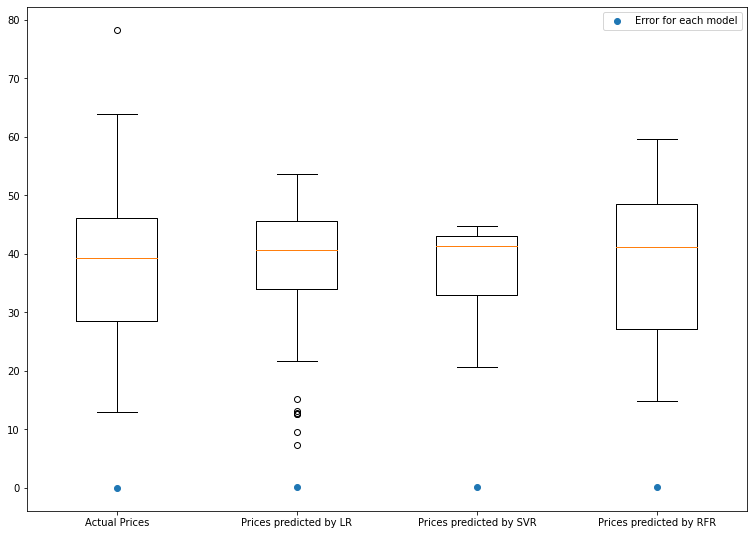

In [19]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0,0,1,1])
data = [Y_valid,Y_pred_LR,Y_pred_SVR,Y_pred_RFR]
accuracy = [0,err_LR,err_SVR,err_LR]
params = [1,2,3,4]
ax.boxplot(data)
ax.scatter(params,accuracy,label = "Error for each model")
plt.xticks([1, 2, 3, 4], ['Actual Prices', 'Prices predicted by LR', 'Prices predicted by SVR', 'Prices predicted by RFR'])
plt.legend()
print(f'Absolute error of the Linear Regression model is {err_LR}\nAbsolute error of the Support Vector Regression model is {err_SVR}\nAbsolute error of the Random Forest Regression model is {err_RFR}')

Conclusion - As the Random Forest regressor has the least error, and has the most similar distribution to the actual values, it is the best model out of the three.